In [17]:
from mongo_processing.create_csv import export_run_events_to_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
export_run_events_to_csv('RUN_EVENTS', '../data/run_events.csv')

Данные успешно записаны в ../data/run_events.csv


In [2]:
df = pd.read_csv('../data/run_events.csv')

In [5]:
columns_to_extract = ['Theta', 'Phi'] + \
    [f'{i}_theta' for i in range(1, 10)] + [f'{i}_phi' for i in range(1, 10)]
angeles_df = df[columns_to_extract]
angeles_df.replace('None', np.nan, inplace=True)
angeles_df.head()

C:\Users\matsvei\AppData\Local\Temp\ipykernel_16084\2898924807.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  angeles_df.replace('None', np.nan, inplace=True)


,Theta,Phi,1_theta,2_theta,3_theta,4_theta,5_theta,6_theta,7_theta,8_theta,9_theta,1_phi,2_phi,3_phi,4_phi,5_phi,6_phi,7_phi,8_phi,9_phi
0,63.67,116.71,NaN,NaN,NaN,NaN,74.330581,49.665467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.088494,108.773362,NaN,NaN,NaN
1,42.90,198.78,NaN,NaN,35.858882,67.982591,49.008071,NaN,NaN,NaN,68.897595,NaN,NaN,198.301806,232.247519,200.195728,NaN,NaN,NaN,190.808834
2,51.32,212.71,49.432327,60.170621,NaN,NaN,41.442137,NaN,NaN,NaN,NaN,207.880117,224.589127,NaN,NaN,229.832647,NaN,NaN,NaN,NaN
3,44.25,234.01,NaN,NaN,NaN,43.561613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.991035,NaN,NaN,NaN,NaN,NaN
4,41.01,139.26,36.820635,31.667377,43.010488,33.510623,20.692531,38.671031,NaN,41.388629,40.300258,136.972015,145.434570,144.268522,144.670791,129.192107,139.700899,NaN,136.938436,138.166407


In [8]:
angeles_df = angeles_df.replace('None', np.nan)

angeles_df.loc[:, 'mean_theta'] = angeles_df[[
    f'{i}_theta' for i in range(1, 10)]].mean(axis=1, skipna=True).round(2)
angeles_df.loc[:, 'median_theta'] = angeles_df[[
    f'{i}_theta' for i in range(1, 10)]].median(axis=1, skipna=True).round(2)

angeles_df.loc[:, 'mean_phi'] = angeles_df[[
    f'{i}_phi' for i in range(1, 10)]].mean(axis=1, skipna=True).round(2)
angeles_df.loc[:, 'median_phi'] = angeles_df[[
    f'{i}_phi' for i in range(1, 10)]].median(axis=1, skipna=True).round(2)

angeles_df.head()

,Theta,Phi,1_theta,2_theta,3_theta,4_theta,5_theta,6_theta,7_theta,8_theta,...,4_phi,5_phi,6_phi,7_phi,8_phi,9_phi,mean_theta,median_theta,mean_phi,median_phi
0,63.67,116.71,NaN,NaN,NaN,NaN,74.330581,49.665467,NaN,NaN,...,NaN,111.088494,108.773362,NaN,NaN,NaN,62.00,62.00,109.93,109.93
1,42.90,198.78,NaN,NaN,35.858882,67.982591,49.008071,NaN,NaN,NaN,...,232.247519,200.195728,NaN,NaN,NaN,190.808834,55.44,58.50,205.39,199.25
2,51.32,212.71,49.432327,60.170621,NaN,NaN,41.442137,NaN,NaN,NaN,...,NaN,229.832647,NaN,NaN,NaN,NaN,50.35,49.43,220.77,224.59
3,44.25,234.01,NaN,NaN,NaN,43.561613,NaN,NaN,NaN,NaN,...,230.991035,NaN,NaN,NaN,NaN,NaN,43.56,43.56,230.99,230.99
4,41.01,139.26,36.820635,31.667377,43.010488,33.510623,20.692531,38.671031,NaN,41.388629,...,144.670791,129.192107,139.700899,NaN,136.938436,138.166407,35.76,37.75,139.42,138.93


In [ ]:
fontsize = {
    'label': 20,
    'title': 22,
    'ticks': 14,
    'legend': 14
}

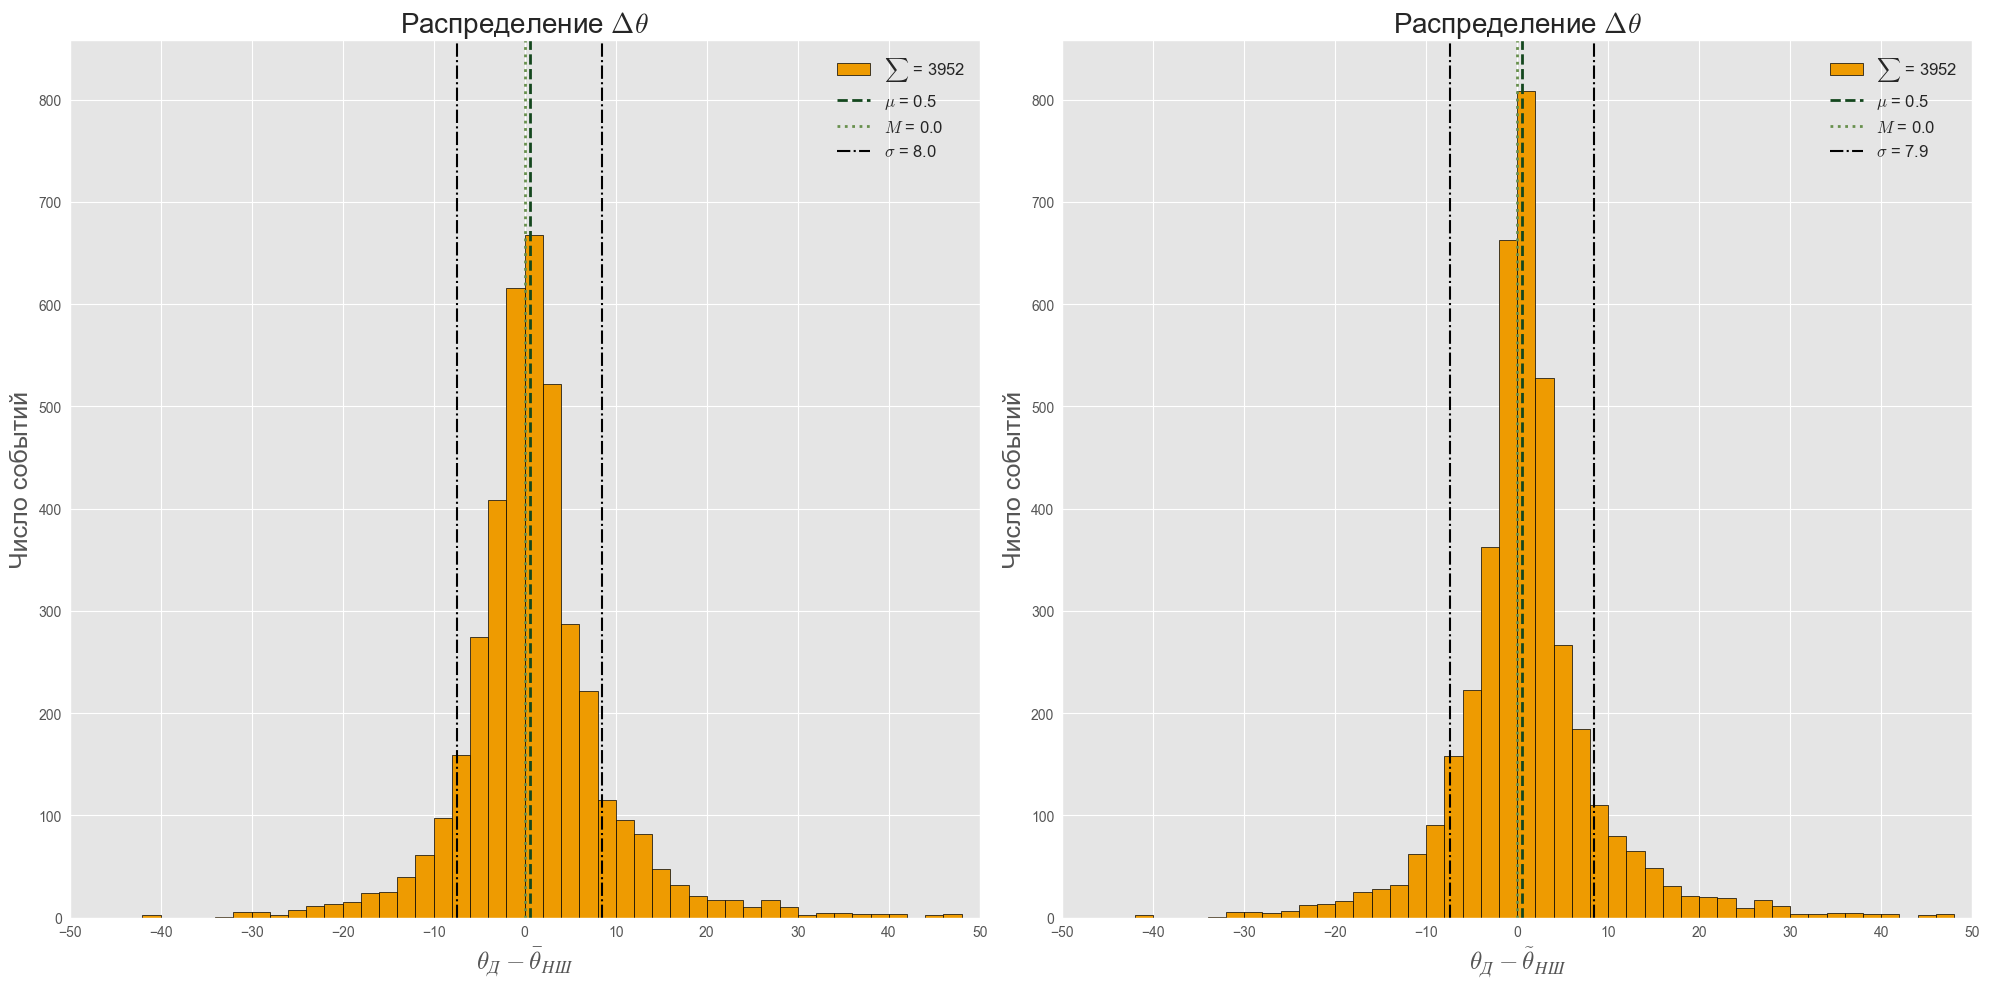

In [207]:
theta = angeles_df['Theta']
phi = angeles_df['Phi']

mean_theta = angeles_df['mean_theta']
median_theta = angeles_df['median_theta']

diff_mean_theta = round(theta - mean_theta, 0)
diff_median_theta = round(theta - median_theta, 0)

plt.figure(figsize=(20, 10))
plt.style.use('ggplot')

# Установка диапазона для бинов по 5
bins = range(int(min(diff_mean_theta.min(), diff_median_theta.min())), int(
    max(diff_mean_theta.max(), diff_median_theta.max())) + 1, 2)

min_diff = min(bins)
max_diff = max(bins)

# Определение общего максимума по оси Y
max_y = max(
    np.histogram(diff_mean_theta.dropna(), bins=bins)[0].max(),
    np.histogram(diff_median_theta.dropna(), bins=bins)[0].max()
) + 50

mu_diff_mean_theta = diff_mean_theta.mean()
M_diff_mean_theta = diff_mean_theta.median()
std_diff_mean_theta = diff_mean_theta.std()

plt.subplot(1, 2, 1)
plt.hist(diff_mean_theta.dropna(), bins=bins,
         edgecolor='black', color='#EE9B01', label=rf'$\sum $ = {len(diff_mean_theta.dropna())}')
plt.axvline(mu_diff_mean_theta, color='#14471E', linestyle='dashed',
            linewidth=2, label=rf'$\mu $ = {mu_diff_mean_theta:.1f}')
plt.axvline(M_diff_mean_theta, color='#68904D', linestyle='dotted',
            linewidth=2, label=rf'$M$ = {M_diff_mean_theta:.1f}')
plt.axvline(mu_diff_mean_theta + std_diff_mean_theta, color='black', linestyle='dashdot',
            linewidth=1.5, label=rf'$\sigma$ = {std_diff_mean_theta:.1f}')
plt.axvline(mu_diff_mean_theta - std_diff_mean_theta,
            color='black', linestyle='dashdot', linewidth=1.5)
plt.xlabel(r'$\theta_{Д} - \bar{\theta}_{НШ}$', fontsize=fontsize['label'])
plt.ylabel('Число событий', fontsize=fontsize['label'])
plt.title(r'Распределение $\Delta \theta$', fontsize=fontsize['title'])
plt.xlim(min_diff, max_diff)
plt.xticks(range((min_diff // 10) * 10, (max_diff // 10 + 2)
           * 10, 10), fontsize=fontsize['ticks'])
plt.yticks(fontsize=fontsize['ticks'])
plt.ylim(0, max_y)
plt.legend(fontsize=fontsize['legend'])


mu_diff_median_theta = diff_median_theta.mean()
M_diff_median_theta = diff_median_theta.median()
std_diff_median_theta = diff_median_theta.std()

plt.subplot(1, 2, 2)
plt.hist(diff_median_theta.dropna(), bins=bins,
         edgecolor='black', color='#EE9B01', label=rf'$\sum $ = {len(diff_median_theta.dropna())}')
plt.axvline(mu_diff_median_theta, color='#14471E', linestyle='dashed',
            linewidth=2, label=rf'$\mu $ = {mu_diff_median_theta:.1f}')
plt.axvline(M_diff_median_theta, color='#68904D', linestyle='dotted',
            linewidth=2, label=rf'$M$ = {M_diff_median_theta:.1f}')
plt.axvline(mu_diff_median_theta + std_diff_median_theta, color='black', linestyle='dashdot',
            linewidth=1.5, label=rf'$\sigma$ = {std_diff_median_theta:.1f}')
plt.axvline(mu_diff_median_theta - std_diff_median_theta,
            color='black', linestyle='dashdot', linewidth=1.5)
plt.xlabel(r'$\theta_{Д} - \tilde{\theta}_{НШ}$', fontsize=fontsize['label'])
plt.ylabel('Число событий', fontsize=fontsize['label'])
plt.title(r'Распределение $\Delta \theta$', fontsize=fontsize['title'])
plt.xlim(min_diff, max_diff)
plt.xticks(range((min_diff // 10) * 10, (max_diff // 10 + 2)
           * 10, 10), fontsize=fontsize['ticks'])
plt.yticks(fontsize=fontsize['ticks'])
plt.ylim(0, max_y)
plt.legend(fontsize=fontsize['legend'])
plt.tight_layout()
plt.savefig('plots/theta_hist.png')
plt.show()

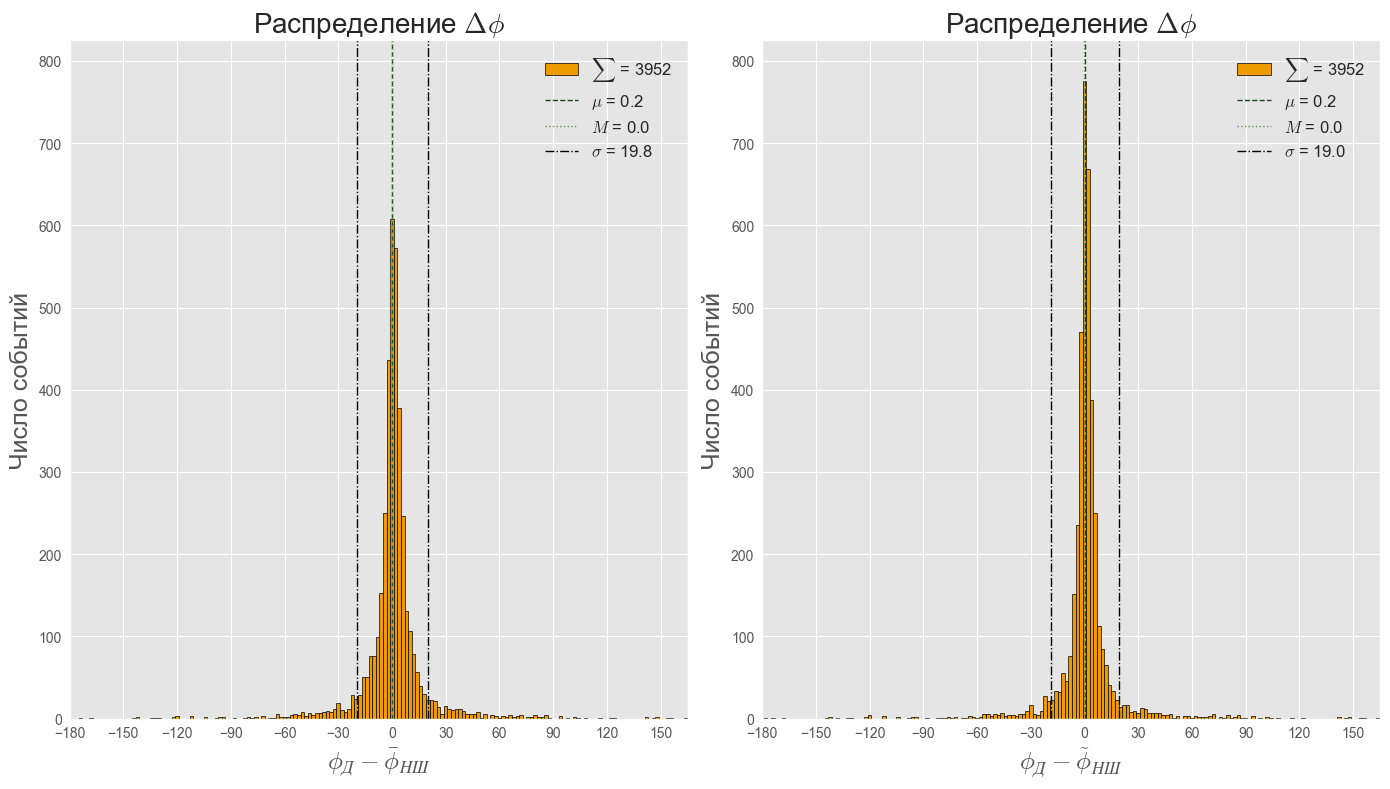

In [204]:
theta = angeles_df['Theta']
phi = angeles_df['Phi']

mean_theta = angeles_df['mean_phi']
median_theta = angeles_df['median_phi']

diff_mean_theta = round((phi - mean_theta + 180) % 360 - 180, 0)
diff_median_theta = round((phi - median_theta + 180) % 360 - 180, 0)

plt.figure(figsize=(14, 8))
plt.style.use('ggplot')

# Установка диапазона для бинов по 5
bins = range(int(min(diff_mean_theta.min(), diff_median_theta.min())), int(
    max(diff_mean_theta.max(), diff_median_theta.max())) + 1, 2)

min_diff = min(bins)
max_diff = max(bins)

# Определение общего максимума по оси Y
max_y = max(
    np.histogram(diff_mean_theta.dropna(), bins=bins)[0].max(),
    np.histogram(diff_median_theta.dropna(), bins=bins)[0].max()
) + 50

mu_diff_mean_theta = diff_mean_theta.mean()
M_diff_mean_theta = diff_mean_theta.median()
std_diff_mean_theta = diff_mean_theta.std()

plt.subplot(1, 2, 1)
plt.hist(diff_mean_theta.dropna(), bins=bins,
         edgecolor='black', color='#EE9B01', label=rf'$\sum $ = {len(diff_mean_theta.dropna())}')
plt.axvline(mu_diff_mean_theta, color='#14471E', linestyle='dashed',
            linewidth=1, label=rf'$\mu $ = {mu_diff_mean_theta:.1f}')
plt.axvline(M_diff_mean_theta, color='#68904D', linestyle='dotted',
            linewidth=1, label=rf'$M$ = {M_diff_mean_theta:.1f}')
plt.axvline(mu_diff_mean_theta + std_diff_mean_theta, color='black', linestyle='dashdot',
            linewidth=1, label=rf'$\sigma$ = {std_diff_mean_theta:.1f}')
plt.axvline(mu_diff_mean_theta - std_diff_mean_theta,
            color='black', linestyle='dashdot', linewidth=1)
plt.xlabel(r'$\phi_{Д} - \bar{\phi}_{НШ}$', fontsize=fontsize['label'])
plt.ylabel('Число событий', fontsize=fontsize['label'])
plt.title(r'Распределение $\Delta \phi$', fontsize=fontsize['title'])
plt.xlim(min_diff, max_diff)
plt.xticks(range((min_diff // 10) * 10, (max_diff // 10 + 2)
           * 10, 30), fontsize=fontsize['ticks'])
plt.yticks(fontsize=fontsize['ticks'])
plt.ylim(0, max_y)
plt.legend(fontsize=fontsize['legend'])


mu_diff_median_theta = diff_median_theta.mean()
M_diff_median_theta = diff_median_theta.median()
std_diff_median_theta = diff_median_theta.std()

plt.subplot(1, 2, 2)
plt.hist(diff_median_theta.dropna(), bins=bins,
         edgecolor='black', color='#EE9B01', label=rf'$\sum $ = {len(diff_median_theta.dropna())}')
plt.axvline(mu_diff_median_theta, color='#14471E', linestyle='dashed',
            linewidth=1, label=rf'$\mu $ = {mu_diff_median_theta:.1f}')
plt.axvline(M_diff_median_theta, color='#68904D', linestyle='dotted',
            linewidth=1, label=rf'$M$ = {M_diff_median_theta:.1f}')
plt.axvline(mu_diff_median_theta + std_diff_median_theta, color='black', linestyle='dashdot',
            linewidth=1, label=rf'$\sigma$ = {std_diff_median_theta:.1f}')
plt.axvline(mu_diff_median_theta - std_diff_median_theta,
            color='black', linestyle='dashdot', linewidth=1)
plt.xlabel(r'$\phi_{Д} - \tilde{\phi}_{НШ}$', fontsize=fontsize['label'])
plt.ylabel('Число событий', fontsize=fontsize['label'])
plt.title(r'Распределение $\Delta \phi$', fontsize=fontsize['title'])
plt.xlim(min_diff, max_diff)
plt.xticks(range((min_diff // 10) * 10, (max_diff // 10 + 2)
           * 10, 30), fontsize=fontsize['ticks'])
plt.yticks(fontsize=fontsize['ticks'])
plt.ylim(0, max_y)
plt.legend(fontsize=fontsize['legend'])
plt.tight_layout()
plt.savefig('plots/phi_hist.png')
plt.show()

In [115]:
def angle_between_vectors(theta1, phi1, theta2, phi2):
    # Перевод углов из сферических координат в декартовы
    x1 = np.sin(np.radians(theta1)) * np.cos(np.radians(phi1))
    y1 = np.sin(np.radians(theta1)) * np.sin(np.radians(phi1))
    z1 = np.cos(np.radians(theta1))

    x2 = np.sin(np.radians(theta2)) * np.cos(np.radians(phi2))
    y2 = np.sin(np.radians(theta2)) * np.sin(np.radians(phi2))
    z2 = np.cos(np.radians(theta2))

    # Вычисление скалярного произведения векторов
    dot_product = x1 * x2 + y1 * y2 + z1 * z2

    # Нормализация значения скалярного произведения, чтобы избежать ошибок из-за численных неточностей
    dot_product = np.clip(dot_product, -1.0, 1.0)

    # Вычисление угла в радианах и перевод в градусы
    angle = np.degrees(np.arccos(dot_product))
    return angle

In [116]:
angeles_df['vecs_angle'] = angeles_df.apply(lambda row: angle_between_vectors(
    row['Theta'], row['Phi'], row['median_theta'], row['mean_phi']), axis=1)

In [118]:
angeles_df['clusters_number'] = angeles_df[[
    f'{i}_theta' for i in range(1, 10)]].notna().sum(axis=1)

In [119]:
angeles_df.head()

,Theta,Phi,1_theta,2_theta,3_theta,4_theta,5_theta,6_theta,7_theta,8_theta,...,6_phi,7_phi,8_phi,9_phi,mean_theta,median_theta,mean_phi,median_phi,vecs_angle,clusters_number
0,63.67,116.71,NaN,NaN,NaN,NaN,74.330581,49.665467,NaN,NaN,...,108.773362,NaN,NaN,NaN,62.00,62.00,109.93,109.93,6.257961,2
1,42.90,198.78,NaN,NaN,35.858882,67.982591,49.008071,NaN,NaN,NaN,...,NaN,NaN,NaN,190.808834,55.44,58.50,205.39,199.25,16.401942,4
2,51.32,212.71,49.432327,60.170621,NaN,NaN,41.442137,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,50.35,49.43,220.77,224.59,6.486600,3
3,44.25,234.01,NaN,NaN,NaN,43.561613,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,43.56,43.56,230.99,230.99,2.204833,1
4,41.01,139.26,36.820635,31.667377,43.010488,33.510623,20.692531,38.671031,NaN,41.388629,...,139.700899,NaN,136.938436,138.166407,35.76,37.75,139.42,138.93,3.261578,8


In [236]:
def plot_angle_distributions(df, clusters_threshold=0, max_clusters=10):
    filtered_df = df[(df['clusters_number'] > clusters_threshold)
                     & (df['clusters_number'] < max_clusters)]
    rounded_angles = filtered_df['vecs_angle'].round(0)

    # Подготовка цветовой карты для кластеров
    cmap = plt.get_cmap('viridis', max_clusters)
    colors = [cmap(i) for i in range(max_clusters)]

    fig, ax1 = plt.subplots(figsize=(10, 8))

    # Построение гистограммы с различными цветами для каждого количества кластеров
    for cluster in range(1, max_clusters):
        cluster_df = filtered_df[filtered_df['clusters_number'] == cluster]
        cluster_angles = cluster_df['vecs_angle'].round(0)
        ax1.hist(cluster_angles, bins=range(0, 100, 2), alpha=1, label=f'{
                 cluster}', edgecolor='black', color=colors[cluster])

    plt.title(f'Угол между векторами, сработавших кластеров > {
              clusters_threshold}', fontsize=fontsize['title'])
    plt.ylabel('Число событий', fontsize=fontsize['label'])
    plt.xlabel('Угол в градусах', fontsize=fontsize['label'])
    plt.legend(fontsize=fontsize['legend'])
    plt.tight_layout()
    plt.savefig('plots/vecs_angel.png')
    plt.show()

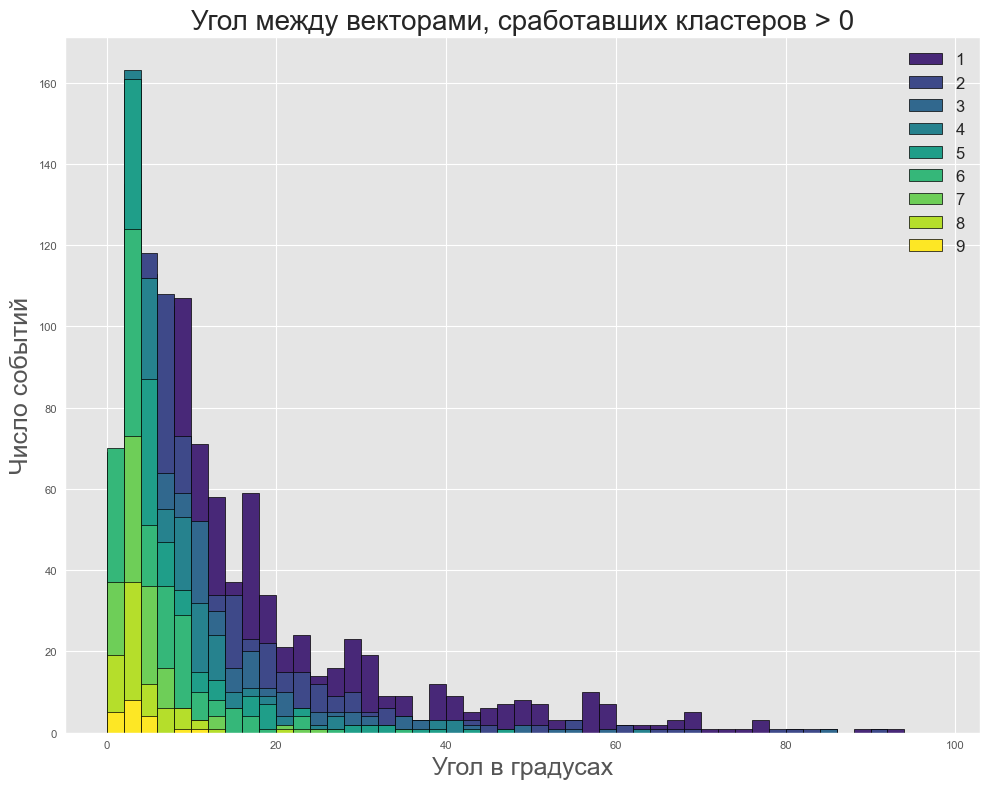

In [237]:
plot_angle_distributions(angeles_df, clusters_threshold=0, max_clusters=10)